# Support Vector Machine

Linear SVM is the newest extremely fast machine learning (data mining) algorithm for solving multiclass classification problems from ultra large data sets that implements an original proprietary version of a cutting plane algorithm for designing a linear support vector machine. LinearSVM is a linearly scalable routine meaning that it creates an SVM model in a CPU time which scales linearly with the size of the training data set. Our comparisons with other known SVM models clearly show its superior performance when high accuracy is required. We would highly appreciate if you may share LinearSVM performance on your data sets with us.



Features

•Efficiency in dealing with extra large data sets (say, several millions training data pairs),

•Solution of multiclass classification problems with any number of classes,

•Working with high dimensional data (thousands of features, attributes) in both sparse and dense format,

•No need for expensive computing resources (personal computer is a standard platform),

•Ideal for contemporary applications in digital advertisement, e-commerce, web page categorization, text classification, bioinformatics, proteomics, banking services and many other areas.


Useful web links;

https://en.wikipedia.org/wiki/Support-vector_machine

http://www.linearsvm.com/

In this section, we'll build a linear SVM classifier to classify emails into spam and ham. The dataset, taken from the UCI ML repository, contains about 4600 emails labelled as spam or ham.

The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase

In [4]:
#making re required imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
#import the data into a data frame
email_rec = pd.read_csv('Spam.csv')

email_rec.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
#shape
email_rec.shape

(4601, 58)

In [8]:
email_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [9]:
email_rec.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


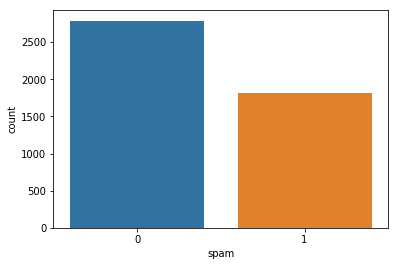

In [11]:
#checking the spam vs ham
sns.countplot(email_rec['spam'])

In [16]:
email_rec['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

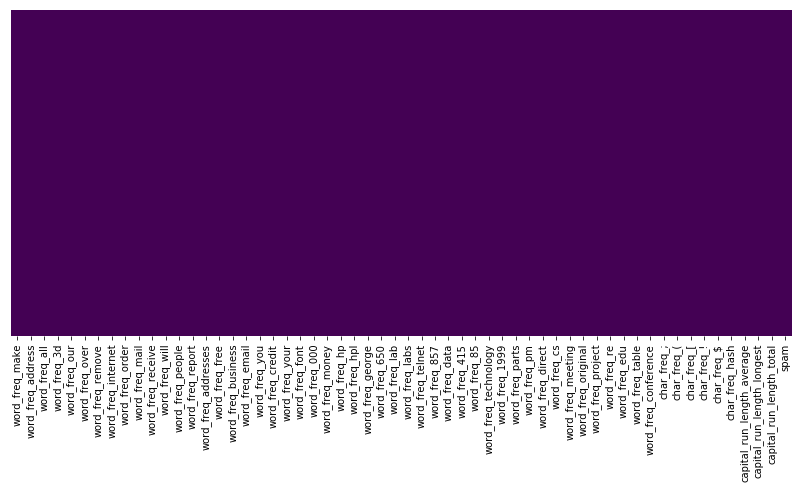

In [23]:
#there is no missing data in data set
plt.figure(figsize=(14,6))
sns.heatmap(email_rec.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

In [25]:
#spliting the data into training and testing set

X = email_rec.drop(['spam'], axis = 1)

y = email_rec.spam.values.astype(int)

In [26]:
#scaling the X using builtin function
from sklearn.preprocessing import scale

X = scale(X)

In [27]:
#doing the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [30]:
#to check if spam and ham have similar distributions.
print(y_train.mean())
print(y_test.mean())

0.3860248447204969
0.41274438812454745


## Model building and getting the predictions

In [31]:
model = SVC(C = 1)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [32]:
#importing the accuracy measuring matrices from sklearn and checking the accuracy scores.

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [33]:
confusion_matrix(y_test, y_pred)

array([[774,  37],
       [ 58, 512]], dtype=int64)

In [34]:
accuracy_score(y_test,y_pred)

0.9312092686459088

In [35]:
recall_score(y_test,y_pred)

0.8982456140350877

In [36]:
precision_score(y_test,y_pred)

0.9326047358834244

In [40]:
# specificity (% of hams correctly classified)
print("specificity", 811/(811+38))

specificity 0.9552414605418139


## K-fold Cross Validation

In [46]:
#creating folds and defining the estimator

fold = KFold(n_splits= 5, random_state= 10, shuffle= True)

model = SVC(C =1)

In [47]:
#computing the cross val scores

cv_results = cross_val_score(model, X_train, y_train, cv = fold, scoring= 'accuracy')

In [48]:
print(cv_results)

[0.91770186 0.93478261 0.94254658 0.91149068 0.93322981]


In [49]:
print(cv_results.mean())

0.9279503105590063


## Grid Search CV to find the optimal setting of parameters

In [50]:
#specify the set of parameters inside a dict
params = {'C': [0.1, 1, 10, 100, 1000]}

model = SVC()

#defining the parameters inside the grid serach and we will use the value of folds as 5
model_cv = GridSearchCV(estimator= model, param_grid= params, scoring= 'accuracy', cv= fold, 
                       verbose= 1, return_train_score= True)

In [51]:
#fit the model

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   11.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [52]:
#getting the results of grid search
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.318804,0.010034,0.066759,0.000748,0.1,{'C': 0.1},0.894410,0.922360,0.908385,0.888199,...,0.903727,0.011826,5,0.912655,0.907997,0.905668,0.907609,0.911102,0.909006,0.002523
1,0.236454,0.026687,0.042173,0.001469,1,{'C': 1},0.917702,0.934783,0.942547,0.911491,...,0.927950,0.011520,2,0.947981,0.944488,0.941770,0.946817,0.950311,0.946273,0.002932
2,0.195479,0.004628,0.033579,0.000490,10,{'C': 10},0.920807,0.923913,0.948758,0.914596,...,0.928261,0.011883,1,0.969332,0.970109,0.966227,0.968556,0.969332,0.968711,0.001336
3,0.255842,0.016700,0.031582,0.001959,100,{'C': 100},0.911491,0.916149,0.944099,0.908385,...,0.921429,0.012977,3,0.990683,0.987578,0.986413,0.988354,0.987966,0.988199,0.001402
4,0.314206,0.039374,0.027183,0.002481,1000,{'C': 1000},0.891304,0.903727,0.931677,0.900621,...,0.908696,0.013972,4,0.995342,0.993789,0.994565,0.995342,0.995342,0.994876,0.000621


In [64]:
#getting the best parameters and score
model_cv.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [65]:
model_cv.best_params_

{'C': 10}

In [66]:
model_cv.best_score_

0.9282608695652174

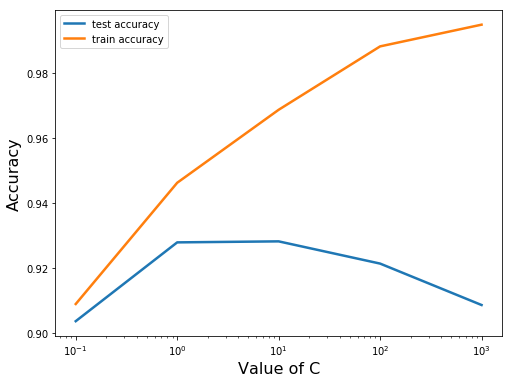

In [56]:
#plotting the test and train score

plt.figure(figsize = (8,6))

plt.plot(cv_results['param_C'], cv_results['mean_test_score'], linewidth = 2.5)
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], linewidth = 2.5)
plt.xlabel('Value of C',fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.legend(['test accuracy', 'train accuracy'], loc = 'upper left')
plt.xscale('log')

### We can say that with the high value of C we tend to over fit the model as out of sample accuracy decreases with higher value of C.

In [61]:
#getting the best value of C

best_score = model_cv.best_score_

best_C = model_cv.best_params_['C']


print('The highest accuracy of {}% is achieved at {} value of C'.format(round((best_score)*100,2), best_C))

The highest accuracy of 92.83% is achieved at 10 value of C


In [62]:
model_cv.best_params_

{'C': 10}

## Now lets get the predictions by putting in the best value of C i,e 10

In [67]:
#get the predictions and measure the accuracy
model = SVC(C = 10)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred)

0.9290369297610427

In [69]:
precision_score(y_test,y_pred)

0.9306569343065694

In [70]:
recall_score(y_test,y_pred)

0.8947368421052632

In this case, we had optimised (tuned) the model based on overall accuracy, though that may not always be the best metric to optimise. For example, if you are concerned more about catching all spams (positives), you may want to maximise TPR or sensitivity/recall. If, on the other hand, you want to avoid classifying hams as spams (so that any important mails don't get into the spam box), you would maximise the TNR or specificity.

In [72]:
#getting the optimal values for earch evaluation matrix
fold = KFold(n_splits= 5, shuffle= True, random_state= 10)
params = {'C': [0.1, 1, 10, 100, 1000]}
model = SVC()
scores = ['precision', 'recall', 'accuracy']

for score in scores: 
    
    print('Tuning the hyper parameter for {}'.format(score))
    
    clf = GridSearchCV(estimator= model, cv = fold, param_grid= params, scoring= score, return_train_score= True)
    
    clf.fit(X_train, y_train)
    
    print('The highest score for {} is {} against a value of C: {}'.format(score, clf.best_score_, clf.best_params_))
    print('\n')
    

Tuning the hyper parameter for precision
The highest score for precision is 0.9444046279138036 against a value of C: {'C': 0.1}


Tuning the hyper parameter for recall
The highest score for recall is 0.8879910544301729 against a value of C: {'C': 10}


Tuning the hyper parameter for accuracy
The highest score for accuracy is 0.9282608695652174 against a value of C: {'C': 10}




In [73]:
## So the optimal value of C (cost) will depend on the choice of evaluation matrix